In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)

In [3]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

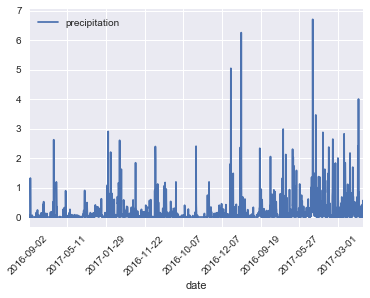

In [4]:
precipitationlist = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-09-01').all()
precipitation = pd.DataFrame(precipitationlist)
precipitation = precipitation.set_index('date')
precipitation = precipitation.rename(columns={'prcp': 'precipitation'})
seaborn.set()
precipitation.plot(rot=45)
plt.show()

In [5]:
precipitation.describe()

,precipitation
count,2165.000000
mean,0.155861
std,0.433581
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [6]:
station_count = session.query(func.count(Station.station)).limit(1).all()
station_count[0][0]

9

In [7]:
session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [8]:
session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).limit(1).all()

[('USC00519281', 2772)]

In [9]:
temperatureobservation = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date > '2016-09-01').all()
temperatureobservation

[('2016-09-02', 'USC00519397', 80),
 ('2016-09-03', 'USC00519397', 79),
 ('2016-09-04', 'USC00519397', 75),
 ('2016-09-05', 'USC00519397', 79),
 ('2016-09-06', 'USC00519397', 76),
 ('2016-09-07', 'USC00519397', 76),
 ('2016-09-08', 'USC00519397', 80),
 ('2016-09-09', 'USC00519397', 79),
 ('2016-09-10', 'USC00519397', 78),
 ('2016-09-11', 'USC00519397', 76),
 ('2016-09-12', 'USC00519397', 78),
 ('2016-09-13', 'USC00519397', 78),
 ('2016-09-14', 'USC00519397', 75),
 ('2016-09-15', 'USC00519397', 79),
 ('2016-09-16', 'USC00519397', 80),
 ('2016-09-17', 'USC00519397', 79),
 ('2016-09-18', 'USC00519397', 81),
 ('2016-09-19', 'USC00519397', 77),
 ('2016-09-20', 'USC00519397', 77),
 ('2016-09-21', 'USC00519397', 78),
 ('2016-09-22', 'USC00519397', 76),
 ('2016-09-23', 'USC00519397', 82),
 ('2016-09-24', 'USC00519397', 81),
 ('2016-09-25', 'USC00519397', 78),
 ('2016-09-26', 'USC00519397', 80),
 ('2016-09-27', 'USC00519397', 80),
 ('2016-09-28', 'USC00519397', 79),
 ('2016-09-29', 'USC00519397

In [10]:
tempobsforhighobsstat = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-09-01').filter(Measurement.station == 'USC00519281').all()
tempobsforhighobsstat

[('2016-09-02', 80),
 ('2016-09-03', 78),
 ('2016-09-04', 78),
 ('2016-09-05', 78),
 ('2016-09-06', 73),
 ('2016-09-07', 74),
 ('2016-09-08', 80),
 ('2016-09-09', 79),
 ('2016-09-10', 77),
 ('2016-09-11', 80),
 ('2016-09-12', 76),
 ('2016-09-13', 79),
 ('2016-09-14', 75),
 ('2016-09-15', 79),
 ('2016-09-16', 78),
 ('2016-09-17', 79),
 ('2016-09-18', 78),
 ('2016-09-19', 78),
 ('2016-09-20', 76),
 ('2016-09-21', 74),
 ('2016-09-22', 77),
 ('2016-09-23', 78),
 ('2016-09-24', 79),
 ('2016-09-25', 79),
 ('2016-09-26', 77),
 ('2016-09-27', 80),
 ('2016-09-28', 78),
 ('2016-09-29', 78),
 ('2016-09-30', 78),
 ('2016-10-01', 77),
 ('2016-10-02', 79),
 ('2016-10-03', 79),
 ('2016-10-04', 79),
 ('2016-10-05', 79),
 ('2016-10-06', 75),
 ('2016-10-07', 76),
 ('2016-10-08', 73),
 ('2016-10-09', 72),
 ('2016-10-10', 71),
 ('2016-10-11', 77),
 ('2016-10-12', 79),
 ('2016-10-13', 78),
 ('2016-10-14', 79),
 ('2016-10-15', 77),
 ('2016-10-16', 79),
 ('2016-10-17', 77),
 ('2016-10-18', 78),
 ('2016-10-19

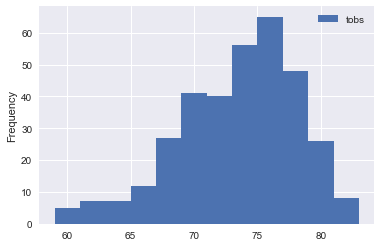

In [11]:
tempobsforhighobsstatfreq = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-09-01').filter(Measurement.station == 'USC00519281').all()
tempobsfreq = pd.DataFrame(tempobsforhighobsstatfreq)
tempobsfreq = tempobsfreq.set_index("date")
seaborn.set()
tempobsfreq.plot.hist(bins=12)
plt.show()

In [12]:
def calc_temps(start_date, end_date):
    min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date < end_date)
    avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date < end_date)
    max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date < end_date)
    return min_temp, avg_temp, max_temp

In [13]:
min_temp, avg_temp, max_temp = calc_temps("2017-01-01", "2017-12-31")

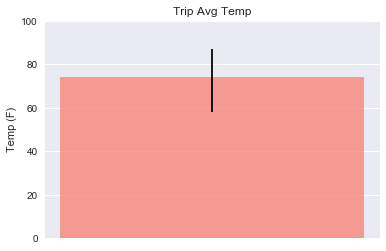

In [14]:
fig, ax = plt.subplots()
ax.errorbar(1.4, ((max_temp[0][0] - min_temp[0][0])/2) + min_temp[0][0], yerr=((max_temp[0][0] - min_temp[0][0])/2), color="black")

plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.ylim(0, 100)


plt.bar(1, avg_temp[0][0], facecolor="salmon", alpha=0.75, align="edge")
plt.xticks(avg_temp[0])

plt.show()